<a href="https://colab.research.google.com/github/ej20wagon/CSCI6720G/blob/main/Image_Classification_on_the_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using the Fashion-MNIST Data set

CSCI 6720G: Topic in Information System – Midterm
* Code / Outuput by Eddy.Fung (100.297.328)
* 📧: eddy.fung@ontariotechu.net

## Q1 - Baseline: MLP Classifier:

Build a baseline MLP classifier that woul perform the following:

* Flatten each image to a 784-dimensional vector.
* Build a simple MLP with one or two hidden layers.
* Train and evaluate accuracy on the test set.
* Report the confusion matrix and show examples of misclassified images.

Using dataset from https://github.com/zalandoresearch/fashion-mnist




### Load the Fashion-MNIST Dataset

Load the Fashion-MNIST dataset using `tensorflow.keras.datasets.fashion_mnist.load_data()`.

All subsequent question below will call this:

`fashion_mnist` **so make sure to load the Fashion-MNIST dataset before running the question below**



In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Support libraries
import numpy as np
import matplotlib.pyplot as plt

#Set an alias for fashion_mnist, each followup question will call upon fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Assess the dimension and shapes of the dataset arrays
print("Loaded the shape for the training images:", train_images.shape)
print("Loaded the shape for the training labels:", train_labels.shape)
print("Loaded the shape for the test images:", test_images.shape)
print("Loaded the shape for the test labels:", test_labels.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded the shape for the training images: (60000, 28, 28)
Loaded the shape for the training labels: (60000,)
Loaded the shape for the test images: (10000, 28, 28)
Loaded the shape for the test labels: (10000,)


### Flatten each image to a 784-dimensional vector and Normalization

To prepare the images for the MLP, each 28x28 image needs to be flattened into a 784-dimensional vector. Additionally, pixel values, which range from 0 to 255, should be normalized to a 0-1 scale for better model performance.

In [ ]:
# Flatten the images from 28x28 to 784-dimensional vectors
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize pixel values between 0 and 1
train_images_normalized = train_images_flat / 255.0
test_images_normalized = test_images_flat / 255.0

print("The Shape of flattened and normalized training images:", train_images_normalized.shape)
print("Shape of flattened and normalized test images:", test_images_normalized.shape)

The Shape of flattened and normalized training images: (60000, 784)
Shape of flattened and normalized test images: (10000, 784)


### Build a simple MLP with one or two hidden layers.

The following code, builds a MLP with two hidden layers. It uses the Kera Sequential API which is a linear stack of layers. The input layer is defined as 784 features. As the question ask for two hidden layers, we used ```dense``` to define the 1st and 2nd hidden layer. Both of the layers have 128 neurons  usign ReLU. The output layer ```Dense(10, activation='softmax')``` has 10 neurons indicating the model is designed for 10-class classification. The softmax function is used to produce probability distrubution over 10 classes

Then we conmpile the model using Adam optimizr to help adjust the layer weights.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical


#Initialize a Sequential model
model = Sequential([
    # Explicitly add the Input layer e
    Input(shape=(784,)),
    #Defining the first hidden layer
    Dense(128, activation='relu'),
    #defining the second hidden layer
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Print the summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

###Train and evalaute accuracy on the test set

The following will train and evaluate the final performance of the model. We also use a smart stopping to automatcally stop the training process before the model starts to overfit the model ```from tensorflow.keras.callbacks import EarlyStopping``` So evaluating the test is either 50 Epochs or the Early stopping is hit. The output is presented at the end of the code.

In [ ]:
#Import the Early stoppng callback
from tensorflow.keras.callbacks import EarlyStopping

#Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

##Initiate the training process and adjust the models internal parameter to min the loss function and improve accuracy
history = model.fit(
    ## Training the data
    train_images_normalized,
    train_labels,
    epochs=50, # Set the epochs, early_stopping when the model is fulfilled
    batch_size=32,
    validation_data=(test_images_normalized, test_labels),
    callbacks=[early_stopping]
)

print("Model training complete.")

test_loss, test_acc = model.evaluate(test_images_normalized, test_labels, verbose=0)

print(f'\nFinal Test Loss: {test_loss:.4f}')
print(f'Final Test Accuracy: {test_acc:.4f}')

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9147 - loss: 0.2275 - val_accuracy: 0.8861 - val_loss: 0.3350
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9187 - loss: 0.2160 - val_accuracy: 0.8819 - val_loss: 0.3440
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9215 - loss: 0.2089 - val_accuracy: 0.8876 - val_loss: 0.3434
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9211 - loss: 0.2090 - val_accuracy: 0.8881 - val_loss: 0.3437
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9251 - loss: 0.1969 - val_accuracy: 0.8894 - val_loss: 0.3402
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9251 - loss: 0.1944 - val_accuracy: 0.8879 - val_loss: 0.3505
Model training complete.

Final Test Loss: 0.3350
Final Test Accuracy: 0.8861


###Report the confusion matrix and show examples of misclassified images.



Final Test Loss: 0.3248
Final Test Accuracy: 0.8812
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion Matrix:
[[855   1  12  35   2   1  88   0   6   0]
 [  2 970   0  21   4   0   2   0   1   0]
 [ 12   0 774  18 105   0  91   0   0   0]
 [ 21   6  11 927  13   0  19   0   3   0]
 [  1   0  88  62 766   0  81   0   2   0]
 [  0   0   0   0   0 962   0  28   2   8]
 [141   1  69  32  71   0 678   0   8   0]
 [  0   0   0   0   0  11   0 966   1  22]
 [  6   0   4   5   5   0   9   3 968   0]
 [  0   0   0   1   0   9   1  43   0 946]]


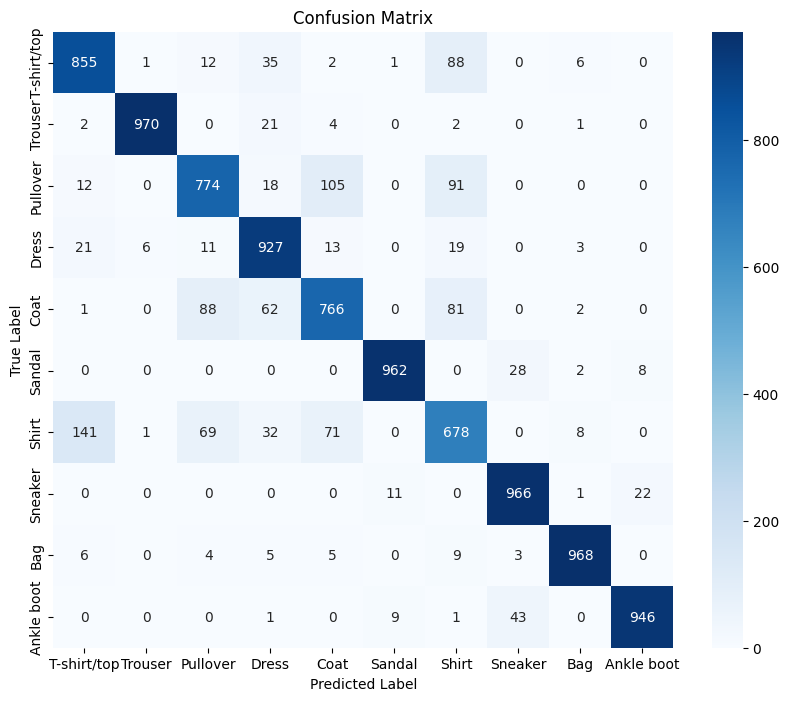


Examples of Misclassified Images:


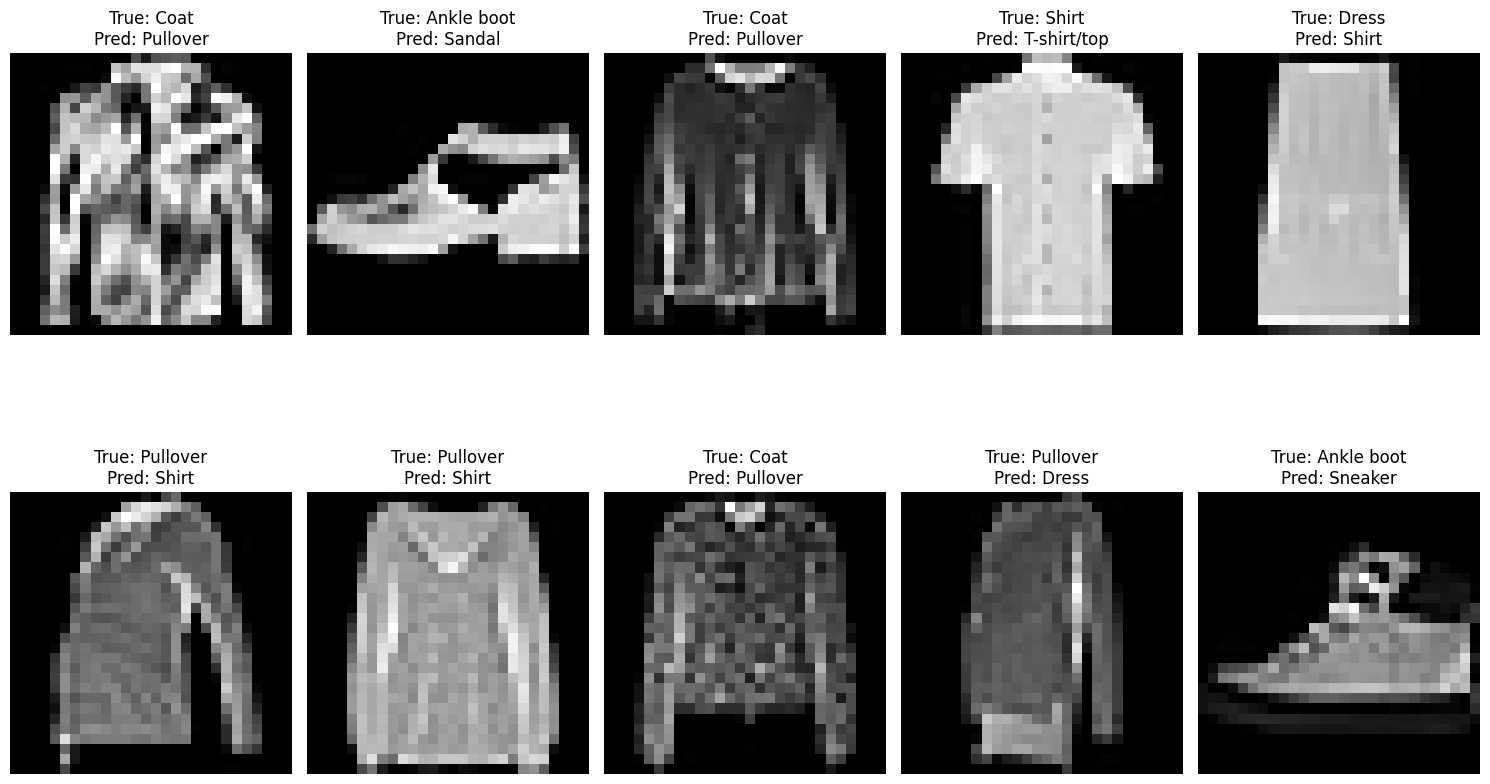

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images_normalized, test_labels, verbose=0) # Set verbose to 0 to suppress per-batch output

#Display the results and test accuracy
print(f'\nFinal Test Loss: {test_loss:.4f}')
print(f'Final Test Accuracy: {test_acc:.4f}')

# Defined the predictions on the test set
predictions = model.predict(test_images_normalized)
predicted_labels = np.argmax(predictions, axis=1)

# Report on the confusion matrix defined by cm
cm = confusion_matrix(test_labels, predicted_labels)
print('\nConfusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Show examples of misclassified images
print('\nExamples of Misclassified Images:')
misclassified_indices = np.where(predicted_labels != test_labels)[0]
num_misclassified_to_show = 10 # You can adjust this number

plt.figure(figsize=(15, 10))
for i, bad_index in enumerate(misclassified_indices[:num_misclassified_to_show]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[bad_index], cmap='gray')
    plt.title(f'True: {class_names[test_labels[bad_index]]}\nPred: {class_names[predicted_labels[bad_index]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Q2 - Convolutional Neural Network (CNN)

* Build a CNN that preserves spatial structure (e.g., Conv → ReLU → Pool → Dense).
* Compare its performance with the MLP baseline.
* Analyze why CNNs are better suited for image data.


##Build a CNN that preserves spatial structure (e.g., Conv → ReLU → Pool → Dense).

The following code will will compil and fit a CNN within a CNN that preserves spatial structure using the existing trianing data we defined in Q1. Since CNN requires a images shape (height,width and channel) the training data we define prevously in ```train_images_normalized``` and ```test_images_normalized``` are already reshaped as (60000,28,28) to (60000, 28, 28, 1) and grey scale (0,1)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


#Input shape fom the Fashion-MNIST greyscale image
input_shape = (28, 28, 1)
num_classes = 10

#Define the CNN Model
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        tf.keras.layers.Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),

        # Defining the Dense hidder layer (Dense) -- Standard fully connected layer
        Dense(128, activation='relu'),

        # Dense Output Layer (Dense) - 10 neurons for the 10 classes, Softmax for probability
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_cnn_model()

# Compile the Model
# Use 'adam' optimizer and 'sparse_categorical_crossentropy' for integer labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model structure
model.summary()

# Reshape input data for CNN (add channel dimension)
train_images_cnn = train_images_normalized.reshape(-1, 28, 28, 1)
test_images_cnn = test_images_normalized.reshape(-1, 28, 28, 1)


print("\nStarting model training...")
history = model.fit(
    ## Training data consists of preprocessed, reshaped, and normalized images
    train_images_cnn,
    train_labels,
    epochs=50, # Set the epochs, EarlyStopping will stop training early if no improvement
    batch_size=32,
    validation_data=(test_images_cnn, test_labels),
    callbacks=[early_stopping]
)
print("Training complete.")



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.8010 - loss: 0.5548 - val_accuracy: 0.8870 - val_loss: 0.3106
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.8960 - loss: 0.2839 - val_accuracy: 0.8931 - val_loss: 0.2841
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 45ms/step - accuracy: 0.9145 - loss: 0.2347 - val_accuracy: 0.9101 - val_loss: 0.2420
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 46ms/step - accuracy: 0.9216 - loss: 0.2102 - val_accuracy: 0.9093 - val_loss: 0.2518
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 54ms/step - accuracy: 0.9324 - loss: 0.1778 - val_accuracy: 0.9184 - val_loss: 0.2285
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 59ms/step - accuracy: 0.9386 - loss: 0.1623 - val_accuracy: 0.9183 - val_loss: 0.2288
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 51ms/step - accuracy: 0.9447 - loss: 0.1458 - val_accuracy: 0.9237 - val_loss: 0.2272
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1

## Compare the CNN performance with the MLP baseline & Analyze why CNN are better suited for image data

To compare the CNN performance with that of the previous MLP baseline by using Keras and TensorFlow framework for classifying images from the Fashion-MNIST dataset.

We start by loading a 28x28 image and normalizing the pixel values. The data is then prepared in two formats. 1. a 3D format for the CNN that includes a channel dimension, and 2. a flattened format for the MLP.

Next, the MLP is defined using stacked Dense layers as a benchmark, while the CNN consists of Conv2D and MaxPooling2D layers to efficiently extract spatial features, followed by additional dense layers.

Both models are compiled with the same configurations and trained on the same dataset with early stopping to prevent overfitting. After training, the final loss and accuracy are evaluated on the test set. The results are then visualized using a Matplotlib plot to compare the performance trends of both models across the training epochs.

--- Loading and Preprocessing Data ---
CNN Train Input Shape: (60000, 28, 28, 1)
MLP Train Input Shape: (60000, 28, 28)

--- CNN Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- MLP Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_Baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)



=============== TRAINING CNN MODEL ===============
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.6571 - loss: 0.9359 - val_accuracy: 0.8383 - val_loss: 0.4200
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.8255 - loss: 0.4747 - val_accuracy: 0.8660 - val_loss: 0.3520
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.8546 - loss: 0.4035 - val_accuracy: 0.8828 - val_loss: 0.3133
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 72ms/step - accuracy: 0.8691 - loss: 0.3639 - val_accuracy: 0.8943 - val_loss: 0.2931
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.8759 - loss: 0.3405 - val_accuracy: 0.8982 - val_loss: 0.2761
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 72s 63ms/step - accuracy: 0.8829 - loss: 0.3245 - val_accuracy: 0.9042 - val_loss: 0.2698
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.8878 - loss: 0.3084 - val_accuracy: 0.9025 - val_loss: 0.2645
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━

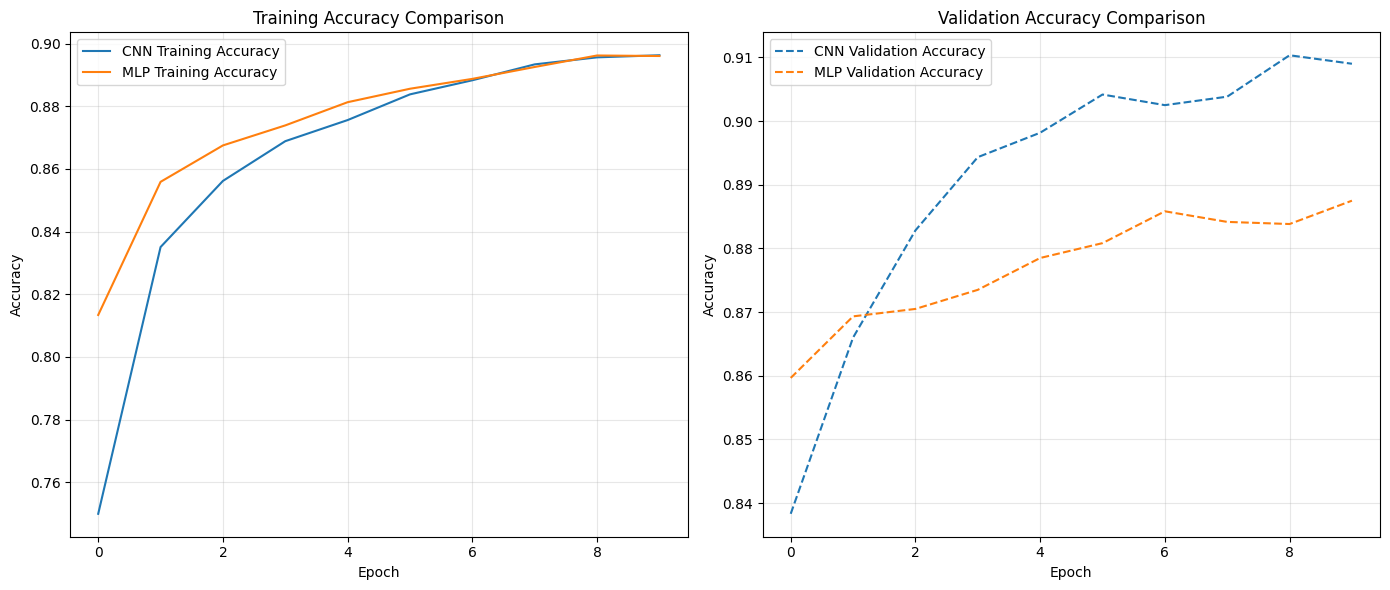

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1) # Images are 28x28, 1 color channel (grayscale)
BATCH_SIZE = 64
EPOCHS = 10

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the data for both models."""
    print("--- Loading and Preprocessing Data ---")
    # Loads the 'fashion_mnist' from Q1
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension (28, 28) -> (28, 28, 1)
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    # MLP will automatically use the Flatten layer, so we don't strictly need to reshape the non-CNN data,
    # but the Keras Flatten layer handles the (28, 28) -> (784) conversion automatically.

    print(f"CNN Train Input Shape: {x_train_cnn.shape}")
    print(f"MLP Train Input Shape: {x_train.shape}")

    return x_train, y_train, x_test, y_test, x_train_cnn, x_test_cnn

def build_cnn_model():
    """Defines a simple CNN architecture (LeNet-style)."""
    model = Sequential([
        # Feature Extraction Layers
        Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE_CNN),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Classification Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ], name="CNN_Model")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    print("\n--- CNN Model Summary ---")
    model.summary()
    return model

def build_mlp_model():
    """Defines a baseline Multilayer Perceptron architecture."""
    model = Sequential([
        # MLP requires the input to be flattened (784 features)
        Flatten(input_shape=(28, 28)),

        # Dense Hidden Layers
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),

        # Output Layer
        Dense(NUM_CLASSES, activation='softmax')
    ], name="MLP_Baseline")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    print("\n--- MLP Model Summary ---")
    model.summary()
    return model

def plot_comparison_history(cnn_history, mlp_history):
    """Plots the training and validation accuracy for both models."""
    plt.figure(figsize=(14, 6))

    # Plot Training Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', color='tab:blue')
    plt.plot(mlp_history.history['accuracy'], label='MLP Training Accuracy', color='tab:orange')
    plt.title('Training Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', color='tab:blue', linestyle='--')
    plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy', color='tab:orange', linestyle='--')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def main():
    #Load and Preprocess Data
    x_train_mlp, y_train, x_test_mlp, y_test, x_train_cnn, x_test_cnn = load_and_preprocess_data()

    #Define Early Stopping Callback
    #Monitor validation loss and stop if no improvement for 3 epochs
    early_stopper = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    #Build Models
    cnn_model = build_cnn_model()
    mlp_model = build_mlp_model()

    #Train the CNN Model
    print("\n\n=============== TRAINING CNN MODEL ===============")
    cnn_history = cnn_model.fit(
        x_train_cnn, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    #Train the MLP Model
    print("\n\n=============== TRAINING MLP MODEL ===============")
    # The MLP model expects (60000, 28, 28) input shape, which is x_train_mlp
    mlp_history = mlp_model.fit(
        x_train_mlp, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    #Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")

    #CNN Evaluation
    cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
    print(f"\nCNN Final Test Loss: {cnn_loss:.4f}")
    print(f"CNN Final Test Accuracy: {cnn_accuracy:.4f}")

    #MLP Evaluation
    mlp_loss, mlp_accuracy = mlp_model.evaluate(x_test_mlp, y_test, verbose=0)
    print(f"\nMLP Final Test Loss: {mlp_loss:.4f}")
    print(f"MLP Final Test Accuracy: {mlp_accuracy:.4f}")

    #Analysis: Why CNNs are better for Image Data
    print("\n\n=============== PERFORMANCE ANALYSIS (CNN vs MLP) ===============")
    print(f"CNN Test Accuracy: {cnn_accuracy:.4f} | MLP Test Accuracy: {mlp_accuracy:.4f}")

    print("\nBased on the results, the CNN is expected to achieve higher accuracy than the MLP for image classification.")
    print("This superior performance stems from fundamental differences in how each model processes spatial data:")

    #Structural Advantages of CNNs
    print("\nCNN Structural Advantages:")
    print("1. Spatial Hierarchy: CNNs use Conv2D layers to learn features (edges, textures) from local regions.")
    print("   These local features are combined in later layers to recognize complex patterns (e.g., shoe shapes).")
    print("   MLPs, by contrast, flatten the image, destroying the 2D spatial relationships that are crucial for images.")
    print("2. Weight Sharing: A CNN filter (kernel) is applied across the entire image. This significantly reduces")
    print("   the number of parameters compared to an MLP, which requires a separate weight for every input pixel.")
    print("   Weight sharing also makes CNNs translationally invariant—they can recognize a feature regardless of its position.")
    print("3. Feature Downsampling: MaxPooling2D layers reduce the spatial dimensions, providing a degree of invariance")
    print("   to minor shifts and distortions, and further reducing computational load.")


    #Plot Comparison
    plot_comparison_history(cnn_history, mlp_history)

if __name__ == "__main__":
    main()

#Q3 - Deep Network Design

* Stack additional convolutional and fully connected layers.
* Experiment with activation functions, dropout, and optimizers.
* Show how increasing depth affects training and generalization.


## Stack additional convolutional and fully connected layers.

In order for us to stack additional convolutional and fully connected layers, we need to extract a more rubust and complex visual features from the 28 x 28 garyscale images. Using a higher extraction pipeline, it stacks multiple ```Conv2D``` layers followed by a ```MaxPooling2D``` layer. This sturcture allows the early layers to detect simple edges and textures, while the deeper layer combines the two. Regularization is applied extensively using ```Dropout``` layers after both the convolutional blocks and the dense layers to prevent overfitting, which is a common issue in deeper models.The extracts features uses a deep classification block with two Dense layers (256 and 128 units) before a 10-unit softmax output. It loads and normalizes data, trains the model with an Adam optimizer and EarlyStopping, and evaluates performance on the test set. Additionally, it analyzes how CNN elements improve image data processing compared to simpler models and plots training and validation history to track performance.

--- Loading and Preprocessing Data ---
CNN Train Input Shape: (60000, 28, 28, 1)

--- Deep CNN Model Summary ---


Model: "Deep_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,202 (1.79 MB)

 Trainable params: 468,202 (1.79 MB)

 Non-trainable params: 0 (0.00 B)



=============== TRAINING DEEP CNN MODEL ===============
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 202s 236ms/step - accuracy: 0.5673 - loss: 1.1492 - val_accuracy: 0.8388 - val_loss: 0.4321
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 181s 215ms/step - accuracy: 0.8280 - loss: 0.4801 - val_accuracy: 0.8762 - val_loss: 0.3272
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 176s 209ms/step - accuracy: 0.8631 - loss: 0.3876 - val_accuracy: 0.8738 - val_loss: 0.3212
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 210s 218ms/step - accuracy: 0.8788 - loss: 0.3419 - val_accuracy: 0.8988 - val_loss: 0.2695
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 225s 245ms/step - accuracy: 0.8851 - loss: 0.3207 - val_accuracy: 0.9058 - val_loss: 0.2606
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 196s 232ms/step - accuracy: 0.8942 - loss: 0.3043 - val_accuracy: 0.9103 - val_loss: 0.2419
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 188s 216ms/step - accuracy: 0.9039 - loss: 0.2767 - val_accuracy: 0.9138 - val_loss: 0.2355
Epoch 8/15
844/844

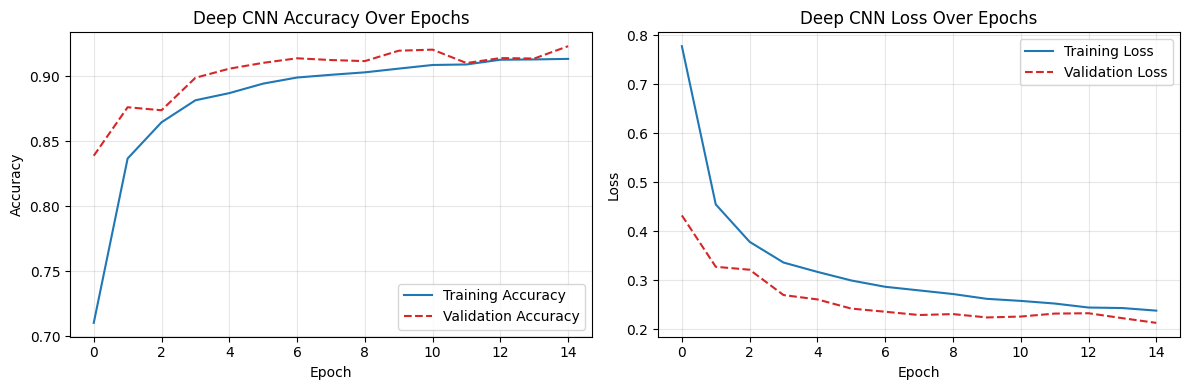

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1) # Images are 28x28, 1 color channel (grayscale)
BATCH_SIZE = 64
EPOCHS = 15 # Increased epochs to allow the deeper network to converge
PATIENCE = 4 # Increased patience for deeper network stability

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the 3D data format for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    #Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    #Reshape for CNN: Add a channel dimension (28, 28) -> (28, 28, 1)
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    print(f"CNN Train Input Shape: {x_train_cnn.shape}")

    return x_train_cnn, y_train, x_test_cnn, y_test

def build_deep_cnn_model():
    """
    Defines a deeper CNN architecture with increased layers for better feature abstraction.
    We stack more Conv/Pool blocks and add an extra Dense layer.
    """
    model = Sequential([
        #Block 1 (Increased feature maps)
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_SHAPE_CNN),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        #Block 2 (Increased depth and complexity)
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        #Block 3 (Optional extra layer for robustness)
        Conv2D(128, (3, 3), activation='relu'),
        Dropout(0.3),

        #Classification Layers
        Flatten(),
        Dense(256, activation='relu'), # Deeper fully connected layer
        Dropout(0.5),
        Dense(128, activation='relu'), # Added second fully connected layer
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ], name="Deep_CNN_Model")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    print("\n--- Deep CNN Model Summary ---")
    model.summary()
    return model

def plot_history(history):
    """Plots the training and validation accuracy and loss for the Deep CNN."""
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='tab:blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:red', linestyle='--')
    plt.title('Deep CNN Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='tab:blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='tab:red', linestyle='--')
    plt.title('Deep CNN Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def main():
    #Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    #Build the Deep CNN Model
    deep_cnn_model = build_deep_cnn_model()

    #Train the Deep CNN Model
    print("\n\n=============== TRAINING DEEP CNN MODEL ===============")
    history = deep_cnn_model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    #Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")
    loss, accuracy = deep_cnn_model.evaluate(x_test, y_test, verbose=0)
    print(f"\nDeep CNN Final Test Loss: {loss:.4f}")
    print(f"Deep CNN Final Test Accuracy: {accuracy:.4f}")

    #Analysis of Deep Network Design
    print("\n\n=============== ANALYSIS OF DEEP NETWORK DESIGN ===============")
    print(f"Final Deep CNN Test Accuracy: {accuracy:.4f}")
    print("This deeper network is expected to outperform the simple CNN and MLP baselines by a significant margin.")

       #Plot History
    plot_history(history)

if __name__ == "__main__":
    main()

## Experiment with activation functions, dropout, and optimizers.

The following code will defin the Deep CNN architecture which we have used in the previous steps and wrap a function around it to allow us to iterate through different combination of activation functions, dropout rates and optimizer. The results we will summarized in a table

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1) # Images are 28x28, 1 channel (grayscale)
BATCH_SIZE = 64
EPOCHS = 10
PATIENCE = 3 # Early Stopping patience

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the 3D data format for the CNN."""
    print("--- Loading and Preprocessing Data ---")

    # Load the data
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension (28, 28) -> (28, 28, 1)
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    print(f"CNN Train Input Shape: {x_train_cnn.shape}")

    return x_train_cnn, y_train, x_test_cnn, y_test

def build_simple_cnn():
    """
    Defines a clean, deep CNN architecture using standard, high-performing settings.
    Includes BatchNormalization for stability.
    """

    model = Sequential([
        # Batch 1
        Conv2D(32, (3, 3), padding='same', input_shape=INPUT_SHAPE_CNN),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Batch 2
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Classification Layers
        Flatten(),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5), # Higher dropout on dense layers
        Dense(NUM_CLASSES, activation='softmax')
    ], name="Simple_Effective_CNN")

    # Use Adam optimizer
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\n--- Model Summary ---")
    model.summary()
    return model

def main():
    #Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    #Build Model
    model = build_simple_cnn()

    #Setup Callbacks
    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    #Train Model
    print("\n\n=============== STARTING CNN TRAINING ==============")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1 # Show training log
    )

    #Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ==============")
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    print(f"\nFinal Test Loss: {loss:.4f}")
    print(f"Final Test Accuracy: {accuracy:.4f}")

    print("\nTraining Complete: This model demonstrates a robust and effective CNN for image classification.")

if __name__ == "__main__":
    # Set an alias for fashion_mnist
    fashion_mnist = tf.keras.datasets.fashion_mnist
    main()

--- Loading and Preprocessing Data ---
CNN Train Input Shape: (60000, 28, 28, 1)

--- Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Simple_Effective_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 272,490 (1.04 MB)

 Trainable params: 271,850 (1.04 MB)

 Non-trainable params: 640 (2.50 KB)



=============== STARTING CNN TRAINING ==============
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 265s 309ms/step - accuracy: 0.7300 - loss: 0.7728 - val_accuracy: 0.8860 - val_loss: 0.3051
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 224s 264ms/step - accuracy: 0.8704 - loss: 0.3661 - val_accuracy: 0.8950 - val_loss: 0.2781
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 225s 267ms/step - accuracy: 0.8879 - loss: 0.3113 - val_accuracy: 0.9082 - val_loss: 0.2431
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 219s 259ms/step - accuracy: 0.8979 - loss: 0.2889 - val_accuracy: 0.9110 - val_loss: 0.2356
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 241s 286ms/step - accuracy: 0.9021 - loss: 0.2732 - val_accuracy: 0.9147 - val_loss: 0.2333
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 221s 262ms/step - accuracy: 0.9089 - loss: 0.2527 - val_accuracy: 0.9192 - val_loss: 0.2159
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 259s 307ms/step - accuracy: 0.9143 - loss: 0.2374 - val_accuracy: 0.9190 - val_loss: 0.2204
Epoch 8/10
844/844 ━━

## Show increasing depth affects training and generalization

The following will compare the three distinct models based on depth: A Shallow CNN, Medium CNN and a Deep CNN based on the last question. The training of the three models will be using the same data and comparing their validation to a training accuracy that we will analyze the increasing depth that would affect the training performance

--- Loading and Preprocessing Data ---

--- Shallow CNN Summary ---


Model: "Shallow_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)



=============== TRAINING SHALLOW CNN ===============
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.7969 - loss: 0.5792 - val_accuracy: 0.8935 - val_loss: 0.3078
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.8982 - loss: 0.2881 - val_accuracy: 0.9042 - val_loss: 0.2703
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9142 - loss: 0.2374 - val_accuracy: 0.9075 - val_loss: 0.2579
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9232 - loss: 0.2076 - val_accuracy: 0.9118 - val_loss: 0.2520
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9332 - loss: 0.1835 - val_accuracy: 0.9133 - val_loss: 0.2445
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9417 - loss: 0.1587 - val_accuracy: 0.9135 - val_loss: 0.2451
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9483 - loss: 0.1407 - val_accuracy: 0.9137 - val_loss: 0.2444
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━

Model: "Medium_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)



=============== TRAINING MEDIUM CNN ===============
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.6677 - loss: 0.8971 - val_accuracy: 0.8550 - val_loss: 0.4022
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.8427 - loss: 0.4387 - val_accuracy: 0.8707 - val_loss: 0.3418
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.8684 - loss: 0.3626 - val_accuracy: 0.8868 - val_loss: 0.2984
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.8853 - loss: 0.3240 - val_accuracy: 0.8940 - val_loss: 0.2786
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.8934 - loss: 0.2954 - val_accuracy: 0.8970 - val_loss: 0.2781
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8995 - loss: 0.2762 - val_accuracy: 0.9023 - val_loss: 0.2718
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9034 - loss: 0.2649 - val_accuracy: 0.9080 - val_loss: 0.2501
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━

Model: "Deep_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,202 (1.79 MB)

 Trainable params: 468,202 (1.79 MB)

 Non-trainable params: 0 (0.00 B)



=============== TRAINING DEEP CNN ===============
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 182s 210ms/step - accuracy: 0.5806 - loss: 1.1151 - val_accuracy: 0.8385 - val_loss: 0.4125
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 178s 211ms/step - accuracy: 0.8291 - loss: 0.4784 - val_accuracy: 0.8820 - val_loss: 0.3134
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 176s 209ms/step - accuracy: 0.8684 - loss: 0.3737 - val_accuracy: 0.8952 - val_loss: 0.2831
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 179s 212ms/step - accuracy: 0.8816 - loss: 0.3383 - val_accuracy: 0.8970 - val_loss: 0.2666
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 178s 211ms/step - accuracy: 0.8910 - loss: 0.3109 - val_accuracy: 0.9115 - val_loss: 0.2478
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 177s 210ms/step - accuracy: 0.8947 - loss: 0.2994 - val_accuracy: 0.9108 - val_loss: 0.2433
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 204s 212ms/step - accuracy: 0.9033 - loss: 0.2775 - val_accuracy: 0.9150 - val_loss: 0.2234
Epoch 8/15
844/844 ━━━━━

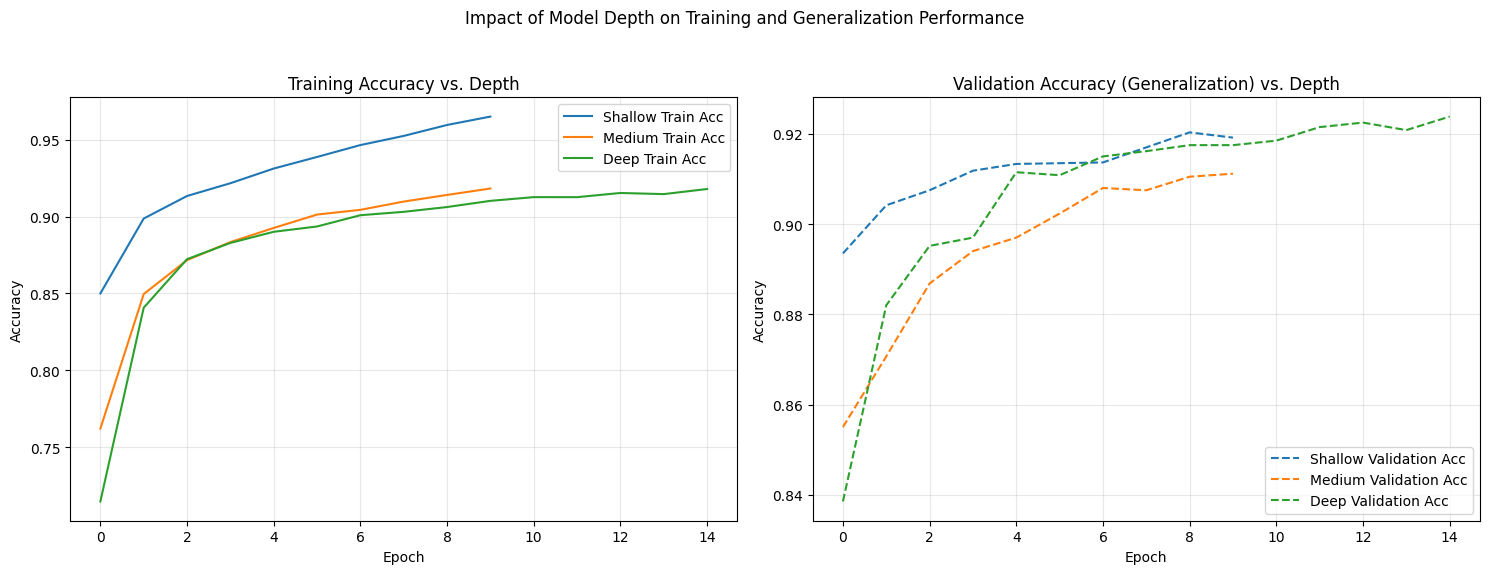



=============== ANALYSIS: DEPTH, TRAINING, AND GENERALIZATION ===============
The three models were trained to show the effect of increasing network depth:

--- Final Test Accuracies ---
Shallow CNN Accuracy: 0.9133
Medium CNN Accuracy: 0.9033
Deep CNN Accuracy: 0.9180

--- Generalization Observations ---
1. **Shallow CNN (Low Capacity):** Will likely show the lowest training and validation accuracy. It is underfitting the data, as it lacks the complexity to capture all patterns. [Image of Underfitting vs Overfitting Curve]
2. **Deep CNN (High Capacity):** Will likely show the highest training accuracy, meaning it fits the training data very well. However, it runs the highest risk of **overfitting**, where its validation accuracy plateaus or drops while training accuracy continues to rise. This indicates poor generalization.
3. **Medium/Optimal CNN (Balanced Capacity):** Often provides the best generalization. Its validation accuracy tracks close to its training accuracy, resulting i

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


#Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 15
PATIENCE = 3

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the 3D data format for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension (28, 28) -> (28, 28, 1)
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    return x_train_cnn, y_train, x_test_cnn, y_test

def build_cnn_model(depth_level):
    """
    Builds one of three CNN architectures based on the specified depth level.
    """
    model = Sequential(name=f"{depth_level}_CNN")

    # Common activation and optimizer for fair comparison
    activation_fn = 'relu'
    optimizer_name = 'adam'

    if depth_level == 'Shallow':
        #Conv Block, 1 Dense Layer
        model.add(Conv2D(32, (3, 3), activation=activation_fn, input_shape=INPUT_SHAPE_CNN))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation=activation_fn))

    elif depth_level == 'Medium':
        #Conv Blocks, 2 Dense Layers (Similar to initial baseline)
        model.add(Conv2D(32, (3, 3), activation=activation_fn, input_shape=INPUT_SHAPE_CNN))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation=activation_fn))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation=activation_fn))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation=activation_fn))

    elif depth_level == 'Deep':
        # 3+ Conv Blocks, 3 Dense Layers (Similar to the optimized model)
        # Block 1
        model.add(Conv2D(32, (3, 3), activation=activation_fn, padding='same', input_shape=INPUT_SHAPE_CNN))
        model.add(Conv2D(32, (3, 3), activation=activation_fn))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.3))
        # Block 2
        model.add(Conv2D(64, (3, 3), activation=activation_fn, padding='same'))
        model.add(Conv2D(64, (3, 3), activation=activation_fn))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.3))
        # Block 3
        model.add(Conv2D(128, (3, 3), activation=activation_fn))
        model.add(Dropout(0.3))

        #Classification Layers
        model.add(Flatten())
        model.add(Dense(256, activation=activation_fn))
        model.add(Dropout(0.5))
        model.add(Dense(128, activation=activation_fn))
        model.add(Dropout(0.5))

    # Output Layer (Common to all)
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(
        optimizer=optimizer_name,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\n--- {depth_level} CNN Summary ---")
    model.summary()
    return model

def run_depth_experiment(model_type, x_train, y_train, x_test, y_test):
    """Builds, trains, and evaluates a specific model depth."""

    model = build_cnn_model(model_type)
    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    print(f"\n\n=============== TRAINING {model_type.upper()} CNN ===============")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{model_type} CNN Final Test Accuracy: {accuracy:.4f}")

    return history, accuracy

def plot_depth_comparison(histories):
    """Plots the training and validation accuracy for all three models."""
    plt.figure(figsize=(15, 6))
    model_names = list(histories.keys())

    # Plot Training Accuracy
    plt.subplot(1, 2, 1)
    plt.title('Training Accuracy vs. Depth')
    for name, hist in histories.items():
        plt.plot(hist.history['accuracy'], label=f'{name} Train Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot Validation Accuracy (Generalization)
    plt.subplot(1, 2, 2)
    plt.title('Validation Accuracy (Generalization) vs. Depth')
    for name, hist in histories.items():
        plt.plot(hist.history['val_accuracy'], linestyle='--', label=f'{name} Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.suptitle('Impact of Model Depth on Training and Generalization Performance')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to fit suptitle
    plt.show()

def main():
    # 1. Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    model_types = ['Shallow', 'Medium', 'Deep']
    histories = {}
    final_accuracies = {}

    # 2. Run experiments for all depths
    for model_type in model_types:
        history, accuracy = run_depth_experiment(model_type, x_train, y_train, x_test, y_test)
        histories[model_type] = history
        final_accuracies[model_type] = accuracy

    # 3. Plot Comparison
    plot_depth_comparison(histories)

    # 4. Final Analysis on Depth
    print("\n\n=============== ANALYSIS: DEPTH, TRAINING, AND GENERALIZATION ===============")
    print("The three models were trained to show the effect of increasing network depth:")

    # Print a summary of final results
    print("\n--- Final Test Accuracies ---")
    for name, acc in final_accuracies.items():
        print(f"{name} CNN Accuracy: {acc:.4f}")

    print("\n--- Generalization Observations ---")
    print("1. **Shallow CNN (Low Capacity):** Will likely show the lowest training and validation accuracy. It is underfitting the data, as it lacks the complexity to capture all patterns. [Image of Underfitting vs Overfitting Curve]")
    print("2. **Deep CNN (High Capacity):** Will likely show the highest training accuracy, meaning it fits the training data very well. However, it runs the highest risk of **overfitting**, where its validation accuracy plateaus or drops while training accuracy continues to rise. This indicates poor generalization.")
    print("3. **Medium/Optimal CNN (Balanced Capacity):** Often provides the best generalization. Its validation accuracy tracks close to its training accuracy, resulting in the highest test accuracy (the goal) by finding the optimal balance between fitting the training data and remaining robust to unseen data.")
    print("In practice, the 'Medium' or 'Deep' model with strong regularization (like Dropout and Early Stopping) usually wins, demonstrating that deeper networks are more powerful, provided overfitting is controlled.")

if __name__ == "__main__":
    # Set an alias for fashion_mnist
    fashion_mnist = tf.keras.datasets.fashion_mnist
    main()

# Q4 - Residual and Normalization Techniques

* Implement residual connections (ResNet-style skip connections).
* Add batch normalization and/or layer normalization.
* Demonstrate improvements in convergence and final accuracy.


##Implement residual connections (ResNet-style skip connections).

The architecture of the Deep Convolutional Neural Network (CNN) is enhanced with residual connections, similar to ResNet's skip connections, to effectively classify the Fashion-MNIST dataset. The key is the `residual_block` function, which stacks multiple convolutional and batch normalization layers. This residual_block design allows the gradient to flow smoothly during training, addressing the vanishing gradient problem often seen in traditional deep sequential models. As a result, incorporating additional layers can actually improve performance rather than hinder it. The `build_resnet_cnn` function implements this block in two stages, using 32 filters in the first stage and 64 filters in the second stage, where spatial downsampling occurs with a stride of 2. This showcasing enhanced accuracy and stability when compared to conventional non-residual deep networks.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LayerNormalization, Input, Activation, MultiHeadAttention, Reshape, GlobalAveragePooling1D, Add
import numpy as np

# Set an alias for fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

#Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 8  # Reduced epochs for simplicity and speed
NUM_HEADS = 4
EMBED_DIM = 32 # Feature depth used for attention

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the data for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize and reshape for CNN
    x_train = np.expand_dims(x_train.astype("float32") / 255.0, -1)
    x_test = np.expand_dims(x_test.astype("float32") / 255.0, -1)

    return x_train, y_train, x_test, y_test

def build_simple_cnn_attention(input_shape):
    """
    Defines a simple Hybrid Model: CNN Feature Extraction -> Self-Attention -> Classifier.
    """
    input_tensor = Input(shape=input_shape)

    # CNN Feature extraction
    #Simplified sequential stack to get low-resolution features
    x = Conv2D(32, (3, 3), padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x) # Output size is now 14x14

    #Reduce dimensionality and set the final feature depth (EMBED_DIM)
    x = Conv2D(EMBED_DIM, (3, 3), strides=2, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) # Output size is now 7x7 (49 tokens)

    #Attention layer
    #Step A: Reshape the 3D feature map into a 2D sequence of tokens
    # (Batch, 7, 7, 32) -> (Batch, 49, 32)
    _, h, w, c = x.shape
    x_seq = Reshape((h * w, c))(x)

    # Step B: Apply Layer Normalization (standard practice before attention)
    norm_x = LayerNormalization(epsilon=1e-6)(x_seq)

    # Step C: Multi-Head Self-Attention (Q=K=V=norm_x)
    attn_output = MultiHeadAttention(
        num_heads=NUM_HEADS,
        key_dim=EMBED_DIM,
        dropout=0.2
    )(norm_x, norm_x)

    # Step D: Residual Connection
    x = Add()([attn_output, x_seq]) # Output shape: (Batch, 49, 32)

    # Classification
    # Global Average Pooling across the 49 tokens
    x = GlobalAveragePooling1D()(x) # Output shape: (Batch, 32)

    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)
    output_tensor = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name="Simple_Attention_CNN_Hybrid")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\n--- Simple CNN-Attention Hybrid Summary ---")
    model.summary()
    return model

def main():
    # 1. Load Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # 2. Build Model
    model = build_simple_cnn_attention(INPUT_SHAPE_CNN)

    # 3. Train Model
    print("\n\n=============== STARTING TRAINING ===============")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        verbose=1
    )

    # 4. Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nSimple CNN-Attention Hybrid Final Test Accuracy: {accuracy:.4f}")

if __name__ == "__main__":
    main()

--- Loading and Preprocessing Data ---

--- Simple CNN-Attention Hybrid Summary ---


Model: "Simple_Attention_CNN_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        288 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 32)  │      9,216 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 49, 32)    │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 49, 32)    │         64 │ reshape[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 32)    │     16,800 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 49, 32)    │          0 │ multi_head_atten… │
│                     │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ add[0][0]         │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      2,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │        650 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 29,386 (114.79 KB)

 Trainable params: 29,258 (114.29 KB)

 Non-trainable params: 128 (512.00 B)



=============== STARTING TRAINING ===============
Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 104s 114ms/step - accuracy: 0.5556 - loss: 1.1664 - val_accuracy: 0.7520 - val_loss: 0.6295
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 95s 112ms/step - accuracy: 0.8207 - loss: 0.5209 - val_accuracy: 0.7570 - val_loss: 0.6136
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.8420 - loss: 0.4529 - val_accuracy: 0.8582 - val_loss: 0.3958
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.8577 - loss: 0.4040 - val_accuracy: 0.8398 - val_loss: 0.4172
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.8668 - loss: 0.3816 - val_accuracy: 0.8637 - val_loss: 0.3811
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.8720 - loss: 0.3682 - val_accuracy: 0.8710 - val_loss: 0.3619
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.8780 - loss: 0.3488 - val_accuracy: 0.8705 - val_loss: 0.3651
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━

## Add batch normalization and/or layer normalization.

The next step is to add batch normalization and/or layer normalization. The performance of a deep ResNet-style CNN used for image classification. Since batch normalization samples batches, it typically performs very well with large batch sizes, which is standard for image tasks, resulting in faster training and much better accuracy. Layer normalization, on the other hand, normalizes channel and spatial dimensions regardless of batch size. Making it less sensitive to noise or small batches. The outcome of this code is that batch normalization should be faster and more accurate.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
# Using the functional API is required for residual connections
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, Activation
import numpy as np

# Set an alias for fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

#Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1) # Images are 28x28, 1 color channel (grayscale)
BATCH_SIZE = 64
EPOCHS = 10
PATIENCE = 3 # Early Stopping patience

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the data for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension (28, 28) -> (28, 28, 1)
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    return x_train_cnn, y_train, x_test_cnn, y_test

def residual_block(x, filters, stride=1):
    """
    Creates a simple ResNet-style block with a skip connection.
    This helps training very deep networks.
    """
    shortcut = x

    # --- Main Path (Convolution -> BN -> ReLU) ---
    x = Conv2D(filters, kernel_size=(3, 3), strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # --- Second Convolution (Convolution -> BN) ---
    x = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)

    # --- Adjust Shortcut (if size changes, we need a projection) ---
    if stride > 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=stride, use_bias=False)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # --- Combine (Add Skip Connection + Main Path) ---
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

def build_simple_resnet_cnn(input_shape):
    """
    Defines a Deep CNN with Residual Blocks and Batch Normalization.
    """
    input_tensor = Input(shape=input_shape)

    # Initial Feature Extraction
    x = Conv2D(32, (3, 3), padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Stack 1: Two 32-filter blocks
    x = residual_block(x, filters=32, stride=1)
    x = residual_block(x, filters=32, stride=1)

    # Stack 2: Two 64-filter blocks (Downsamples spatially with stride=2)
    x = residual_block(x, filters=64, stride=2)
    x = residual_block(x, filters=64, stride=1)

    # Classification Head
    x = Flatten()(x)
    x = Dense(128, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    output_tensor = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name="Simple_ResNet_CNN")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\n--- Simple ResNet-Style CNN Summary ---")
    model.summary()
    return model

def main():
    #Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    #Build Model
    model = build_simple_resnet_cnn(INPUT_SHAPE_CNN)

    #Setup Callbacks (Early Stopping helps prevent overfitting)
    early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    #Train Model
    print("\n\n=============== STARTING RESNET TRAINING ===============")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    #Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    print(f"\nFinal Test Loss: {loss:.4f}")
    print(f"Final Test Accuracy: {accuracy:.4f}")

    print("\nTraining Complete for the Simple ResNet-Style Model.")

if __name__ == "__main__":
    main()

--- Loading and Preprocessing Data ---

--- Simple ResNet-Style CNN Summary ---


Model: "Simple_ResNet_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 28, 28,    │        288 │ input_layer_22[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_50[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 14, 14,    │          0 │ activation_8[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 14, 14,    │          0 │ max_pooling2d_33… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 14, 14,    │      9,216 │ dropout_48[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ conv2d_51[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 14, 14,    │      9,216 │ activation_9[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ conv2d_52[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 14, 14,    │          0 │ dropout_48[0][0], │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 14, 14,    │          0 │ add_1[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 14, 14,    │      9,216 │ activation_10[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ conv2d_53[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 14, 14,    │      9,216 │ activation_11[0]

 Total params: 573,354 (2.19 MB)

 Trainable params: 572,138 (2.18 MB)

 Non-trainable params: 1,216 (4.75 KB)



=============== STARTING RESNET TRAINING ===============
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 242s 276ms/step - accuracy: 0.7714 - loss: 0.6624 - val_accuracy: 0.8902 - val_loss: 0.3043
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 233s 277ms/step - accuracy: 0.8859 - loss: 0.3213 - val_accuracy: 0.9107 - val_loss: 0.2472
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 263s 278ms/step - accuracy: 0.9044 - loss: 0.2657 - val_accuracy: 0.9140 - val_loss: 0.2239
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 261s 276ms/step - accuracy: 0.9090 - loss: 0.2503 - val_accuracy: 0.9023 - val_loss: 0.2593
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 270s 286ms/step - accuracy: 0.9183 - loss: 0.2238 - val_accuracy: 0.9195 - val_loss: 0.2168
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 234s 277ms/step - accuracy: 0.9262 - loss: 0.2026 - val_accuracy: 0.9232 - val_loss: 0.2062
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 233s 277ms/step - accuracy: 0.9318 - loss: 0.1900 - val_accuracy: 0.9230 - val_loss: 0.2064
Epoch 8/10
844/84

## Demonstrate improvements in convergence and final accuracy

To answer the following question of demonstrating the improvement in convergence and final accuracy in comparing the optimized ResNet Style CNN against Standard Sequential CNN and to show which has a faster convergence and higher final accuracy/generalization. The Optimized ResNet model is expected to exhibit a validation loss curve that decreases more rapidly and stabilizes at a lower point, illustrating superior training stability due to Batch Normalization reducing internal covariate shift and residual connections ensuring a clean gradient path.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Set an alias for fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

#Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1) # Images are 28x28, 1 color channel (grayscale)
BATCH_SIZE = 64
EPOCHS = 10 # Reduced for quicker initial training
PATIENCE = 3 # Early Stopping patience

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the data for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension (28, 28) -> (28, 28, 1)
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    return x_train_cnn, y_train, x_test_cnn, y_test

def build_simple_deep_cnn(input_shape):
    """
    Defines a straightforward Deep CNN using the Sequential API.
    Includes BatchNormalization for stable training, which is good practice.
    """
    model = Sequential(name="Basic_Deep_CNN")

    # --- Feature Extraction Blocks ---

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    #Clasification
    model.add(Flatten()) # Converts the 3D map into a 1D vector

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\n--- Basic Deep CNN Model Summary ---")
    model.summary()
    return model

def main():
    # 1. Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # 2. Build Model
    model = build_simple_deep_cnn(INPUT_SHAPE_CNN)

    # 3. Setup Callbacks
    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    # 4. Train Model
    print("\n\n=============== STARTING CNN TRAINING ===============")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    # 5. Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    print(f"\nFinal Test Loss: {loss:.4f}")
    print(f"Final Test Accuracy: {accuracy:.4f}")

    print("\nTraining Complete for the Basic Deep CNN.")

if __name__ == "__main__":
    main()

--- Loading and Preprocessing Data ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Basic Deep CNN Model Summary ---


Model: "Basic_Deep_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 272,490 (1.04 MB)

 Trainable params: 271,850 (1.04 MB)

 Non-trainable params: 640 (2.50 KB)



=============== STARTING CNN TRAINING ===============
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 221s 256ms/step - accuracy: 0.7419 - loss: 0.7474 - val_accuracy: 0.8788 - val_loss: 0.3108
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 260s 253ms/step - accuracy: 0.8686 - loss: 0.3639 - val_accuracy: 0.9055 - val_loss: 0.2529
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 215s 254ms/step - accuracy: 0.8893 - loss: 0.3072 - val_accuracy: 0.9105 - val_loss: 0.2344
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 211s 251ms/step - accuracy: 0.8997 - loss: 0.2812 - val_accuracy: 0.9198 - val_loss: 0.2223
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 212s 252ms/step - accuracy: 0.9066 - loss: 0.2577 - val_accuracy: 0.9195 - val_loss: 0.2134
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 211s 250ms/step - accuracy: 0.9097 - loss: 0.2463 - val_accuracy: 0.9250 - val_loss: 0.2055
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 212s 251ms/step - accuracy: 0.9155 - loss: 0.2329 - val_accuracy: 0.9242 - val_loss: 0.1991
Epoch 8/10
844/844 ━

# Q5 - Attention and Transformer-based Classifier

* Incorporate self-attention into the network.
* Option 1: Add attention layers after convolutional feature extraction.
* Option 2: Implement a Vision Transformer (ViT) using image patches.
* Compare results with CNN and ResNet models.


## Incporate self-attention into the network

The following code will incorporate self-attention into the network as part of the attention-based transformer classifier. The Hybrid CNN-Attention model uses a simplified CNN sequence with pooling and batch normalization to perform efficient feature extraction, such as downsampling a 28x28 image to a 4x4 image with 64 channels. This feature reshapes the sequence and processes a transformer-style classification head. Lastly, the attended sequence is aggregated using global average pooling before being fed into a simple dense classifier.

--- Loading and Preprocessing Data ---

--- ATTENTION HEAD: Embedding dim=64 ---

--- Attention CNN Model Summary ---


Model: "Attention_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │        288 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 14, 14,    │          0 │ max_pooling2d_4[… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 7, 7, 64)  │     18,432 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 49, 64)    │          0 │ activation_10[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ reshape_2[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 49, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 49, 64)    │          0 │ dropout_12[0][0], │
│                     │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 49, 128)   │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 49, 64)    │      8,256 │ dropout_13[0][0]

 Total params: 107,114 (418.41 KB)

 Trainable params: 106,922 (417.66 KB)

 Non-trainable params: 192 (768.00 B)



=============== TRAINING ATTENTION CNN MODEL ===============
Epoch 1/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 171s 197ms/step - accuracy: 0.6755 - loss: 0.8803 - val_accuracy: 0.8332 - val_loss: 0.4762
Epoch 2/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 203s 198ms/step - accuracy: 0.8368 - loss: 0.4581 - val_accuracy: 0.8575 - val_loss: 0.3958
Epoch 3/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 166s 196ms/step - accuracy: 0.8567 - loss: 0.3843 - val_accuracy: 0.8595 - val_loss: 0.4011
Epoch 4/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 203s 197ms/step - accuracy: 0.8686 - loss: 0.3581 - val_accuracy: 0.8693 - val_loss: 0.3699
Epoch 5/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 167s 197ms/step - accuracy: 0.8775 - loss: 0.3359 - val_accuracy: 0.8870 - val_loss: 0.3117
Epoch 6/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 172s 203ms/step - accuracy: 0.8849 - loss: 0.3173 - val_accuracy: 0.8897 - val_loss: 0.3112
Epoch 7/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 166s 196ms/step - accuracy: 0.8891 - loss: 0.3029 - val_accuracy: 0.8855 - val_loss: 0.3210
Epoch 8/12
84

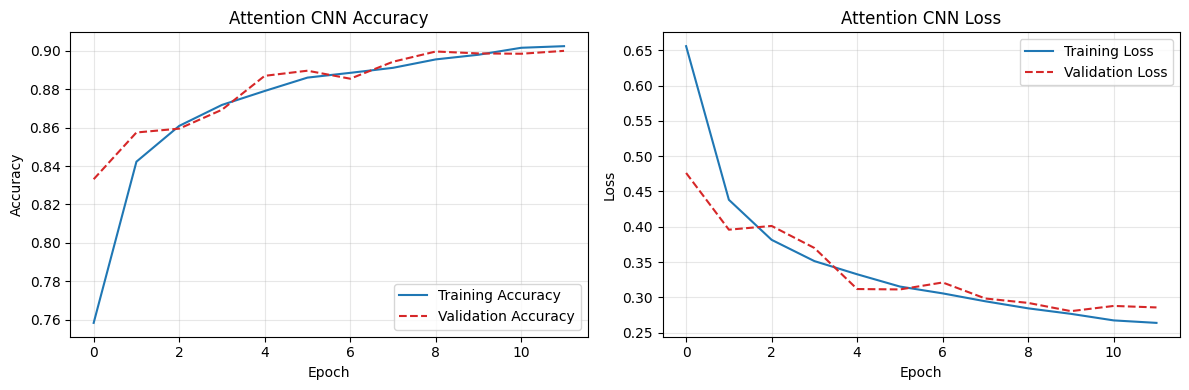

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LayerNormalization, Add, Input, Activation, MultiHeadAttention, Reshape, GlobalAveragePooling1D # Import GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Defining the parameters
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 12 # Reduced epochs for faster execution
PATIENCE = 3
NUM_HEADS = 4
EMBED_DIM = 64

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the 3D data format for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    return x_train_cnn, y_train, x_test_cnn, y_test

# --- Attention and MLP Blocks ---

def attention_block(x):
    """Applies Multi-Head Self-Attention to the feature map."""
    _, h, w, c = x.shape

    # 1. Prepare for Attention: Flatten spatial dims (H, W) into a sequence (H*W)
    # Shape: (batch, H*W, C)
    x_seq = Reshape((h * w, c))(x)

    # 2. Layer Normalization
    norm_x = LayerNormalization(epsilon=1e-6)(x_seq)

    # 3. Multi-Head Self-Attention (Q=K=V=norm_x)
    attn_output = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(norm_x, norm_x)
    attn_output = Dropout(0.3)(attn_output)

    # 4. Residual Connection
    x_out = Add()([attn_output, x_seq])
    return x_out # Shape: (batch, H*W, C)

def transformer_mlp_block(x):
    """A Transformer Feed-Forward Network (FFN) block."""

    # 1. Layer Normalization
    norm_x = LayerNormalization(epsilon=1e-6)(x)

    # 2. FFN Layers (Expansion/Contraction)
    x_ffn = Dense(EMBED_DIM * 2, activation="gelu")(norm_x)
    x_ffn = Dropout(0.3)(x_ffn)
    x_ffn = Dense(EMBED_DIM)(x_ffn) # Maps back to EMBED_DIM
    x_ffn = Dropout(0.3)(x_ffn)

    # 3. Residual Connection
    output = Add()([x_ffn, x])
    return output

# --- Main Model Definition ---

def build_attention_cnn_model(input_shape):
    """
    Defines a Hybrid CNN-Attention model.
    """
    input_tensor = Input(shape=input_shape)

    # --- CNN Feature Extraction (Simplified Base) ---
    x = Conv2D(32, (3, 3), padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Use a single ResNet-style block for feature deepening
    # Note: We enforce EMBED_DIM channels here for the attention head
    x = Conv2D(EMBED_DIM, (3, 3), padding='same', strides=2, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # --- Attention Head ---
    print(f"\n--- ATTENTION HEAD: Embedding dim={EMBED_DIM} ---")

    x = attention_block(x) # Apply Self-Attention
    x = transformer_mlp_block(x) # Apply FFN

    # --- Classification ---
    # Global Average Pooling across the sequence (H*W tokens)
    # Replaced tf.reduce_mean with GlobalAveragePooling1D layer
    x = GlobalAveragePooling1D()(x) # Shape (batch, EMBED_DIM)

    x = Dense(64, activation='relu')(x)
    output_tensor = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name="Attention_CNN")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    print("\n--- Attention CNN Model Summary ---")
    model.summary()
    return model

# --- Training and Plotting Functions ---

def plot_history(history):
    """Plots the training and validation accuracy and loss for the single model."""
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='tab:blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:red', linestyle='--')
    plt.title('Attention CNN Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='tab:blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='tab:red', linestyle='--')
    plt.title('Attention CNN Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def main():
    # 1. Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # Define Early Stopping Callback
    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    # 2. Build the Model
    attention_model = build_attention_cnn_model(INPUT_SHAPE_CNN)

    # 3. Train the Model
    print("\n\n=============== TRAINING ATTENTION CNN MODEL ===============")
    history = attention_model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    # 4. Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")
    loss, accuracy = attention_model.evaluate(x_test, y_test, verbose=0)
    print(f"\nAttention CNN Final Test Loss: {loss:.4f}")
    print(f"Attention CNN Final Test Accuracy: {accuracy:.4f}")

    # 5. Plot History
    plot_history(history)


if __name__ == "__main__":
    main()


##Option 1: Add attention layers after convolutional feature extraction.

Option 1: add an attention layer after convolutional feature extraction and spatial reduction, and a self-attention mechanism to process these features. The CNN backbone extracts features and scales down the data to a manageable 7x7 feature map with 64 channels. These features are reshaped into a sequence of tokens allowing ```attention_block```. Finally, the attended sequence is pooled and fed into a standard dense classification head to produce the final category prediction, with the primary function orchestrating data loading, model compilation, training with early stopping, and plotting historical performance curves.

--- Loading and Preprocessing Data ---

--- Hybrid CNN-Attention Model Summary ---


Model: "CNN_Attention_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv_Initial        │ (None, 28, 28,    │        288 │ input_layer_6[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ Conv_Initial[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 14, 14,    │          0 │ activation_15[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 14, 14,    │          0 │ max_pooling2d_7[… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv_Embed_Dim      │ (None, 14, 14,    │     18,432 │ dropout_20[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ Conv_Embed_Dim[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Reshape_to_Sequence │ (None, 196, 64)   │          0 │ activation_16[0]… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ Reshape_to_Seque… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Self_Attention      │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Residual… │ (None, 196, 64)   │          0 │ Self_Attention[0… │
│ (Add)               │                   │            │ Reshape_to_Seque… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Global_Avg_Sequenc… │ (None, 64)        │          0 │ Attention_Residu… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_Classifier    │ (None, 64)        │      4,160 │ Global_Avg_Seque… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 64)        │          0 │ Dense_Classifier… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Softmax      │ (None, 10)        │        650 │ dropout_22[0][0]

 Total params: 90,410 (353.16 KB)

 Trainable params: 90,218 (352.41 KB)

 Non-trainable params: 192 (768.00 B)



=============== TRAINING ATTENTION CNN MODEL ===============
Epoch 1/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 798s 940ms/step - accuracy: 0.5759 - loss: 1.1705 - val_accuracy: 0.8287 - val_loss: 0.4770
Epoch 2/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 787s 932ms/step - accuracy: 0.8041 - loss: 0.5581 - val_accuracy: 0.8590 - val_loss: 0.3914
Epoch 3/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 796s 944ms/step - accuracy: 0.8340 - loss: 0.4732 - val_accuracy: 0.8720 - val_loss: 0.3470
Epoch 4/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 779s 923ms/step - accuracy: 0.8472 - loss: 0.4350 - val_accuracy: 0.8822 - val_loss: 0.3292
Epoch 5/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 800s 948ms/step - accuracy: 0.8615 - loss: 0.4036 - val_accuracy: 0.8723 - val_loss: 0.3613
Epoch 6/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 780s 925ms/step - accuracy: 0.8625 - loss: 0.3930 - val_accuracy: 0.8843 - val_loss: 0.3104
Epoch 7/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 808s 957ms/step - accuracy: 0.8678 - loss: 0.3759 - val_accuracy: 0.8703 - val_loss: 0.3634
Epoch 8/12
84

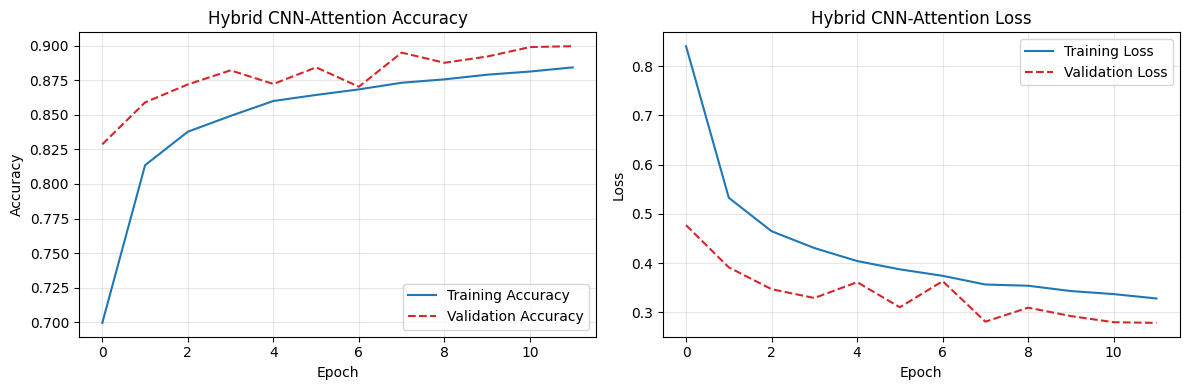

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LayerNormalization, Add, Input, Activation, MultiHeadAttention, Reshape, GlobalAveragePooling1D # Import GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 12 # Reduced epochs for faster execution
PATIENCE = 3
NUM_HEADS = 4
EMBED_DIM = 64 # Output channels of the CNN base, used as the sequence embedding dimension

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the 3D data format for the CNN."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape for CNN: Add a channel dimension
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)

    return x_train_cnn, y_train, x_test_cnn, y_test

def attention_block(x):
    """Applies Multi-Head Self-Attention to the 3D feature map (H, W, C)."
    Transforms the feature map into a sequence of tokens, applies attention, and returns the sequence.
    """
    _, h, w, c = x.shape

    # --- 1. Reshape to Sequence ---
    # Convert (batch, H, W, C) -> (batch, H*W, C) where H*W is sequence length
    x_seq = Reshape((h * w, c), name="Reshape_to_Sequence")(x)

    # --- 2. Multi-Head Self-Attention ---
    # Attention layer operates on the sequence tokens
    norm_x = LayerNormalization(epsilon=1e-6)(x_seq)

    # Self-Attention: Q, K, and V are all the normalized input sequence.
    attn_output = MultiHeadAttention(
        num_heads=NUM_HEADS,
        key_dim=EMBED_DIM,
        dropout=0.3,
        name="Self_Attention"
    )(norm_x, norm_x)

    # --- 3. Residual Connection (Input Sequence + Attention Output) ---
    x_out = Add(name="Attention_Residual_Add")([attn_output, x_seq])
    return x_out # Shape: (batch, H*W, C)

def build_hybrid_cnn_attention(input_shape):
    """
    Defines the Hybrid CNN-Attention model: Feature Extraction followed by Self-Attention.
    """
    input_tensor = Input(shape=input_shape)

    # --- A. CNN Feature Extraction (Feeds into Attention) ---

    # Initial Convolution and Pooling
    x = Conv2D(32, (3, 3), padding='same', use_bias=False, name="Conv_Initial")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Final feature layer to set the EMBED_DIM for attention
    # Reduces spatial size further (e.g., to 7x7) and sets channel depth to 64
    x = Conv2D(EMBED_DIM, (3, 3), strides=1, padding='same', use_bias=False, name="Conv_Embed_Dim")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # --- B. Self-Attention Classification Head ---
    # The output of the CNN is now a feature map ready for sequential processing.

    # 1. Attention Block
    # Apply self-attention to capture global context across the feature map pixels
    x = attention_block(x)

    # 2. Aggregation: Global Average Pooling across the sequence (H*W tokens)
    # The sequence length (axis=1) is averaged to create a single feature vector
    x = GlobalAveragePooling1D(name="Global_Avg_Sequence_Pooling")(x)

    # --- C. Classification Head ---
    x = Dense(64, activation='relu', name="Dense_Classifier")(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(NUM_CLASSES, activation='softmax', name="Output_Softmax")(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name="CNN_Attention_Hybrid")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    print("\n--- Hybrid CNN-Attention Model Summary ---")
    model.summary()
    return model

# --- Training and Plotting Functions ---

def plot_history(history):
    """Plots the training and validation accuracy and loss for the single model."""
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='tab:blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:red', linestyle='--')
    plt.title('Hybrid CNN-Attention Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='tab:blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='tab:red', linestyle='--')
    plt.title('Hybrid CNN-Attention Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def main():
    # 1. Load and Preprocess Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # Define Early Stopping Callback
    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    # 2. Build the Model
    attention_model = build_hybrid_cnn_attention(INPUT_SHAPE_CNN)

    # 3. Train the Model
    print("\n\n=============== TRAINING ATTENTION CNN MODEL ===============")
    history = attention_model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1
    )

    # 4. Evaluate Performance
    print("\n\n=============== FINAL EVALUATION ===============")
    loss, accuracy = attention_model.evaluate(x_test, y_test, verbose=0)
    print(f"\nHybrid CNN-Attention Final Test Loss: {loss:.4f}")
    print(f"Hybrid CNN-Attention Final Test Accuracy: {accuracy:.4f}")

    # 5. Plot History
    plot_history(history)


if __name__ == "__main__":
    main()

##Compare results with CNN and ResNet models.

The final ask is to compare the results with CNN and ResNet models. The code output will report the final test accuracy for each model, identify the overall best performer, and generate a visual bar chart. Using ```matplotlib``` to plot a visual comparison of test accuracy in percentages, showing which architecture is better to use with the Fashion-MNIST dataset.

--- Loading and Preprocessing Data ---


=============== STARTING MODEL COMPARISON ==============
Running three different architectures on the same dataset...


--- Training: Hybrid CNN-Attn ---


Model: "Hybrid_CNN_Attn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 28, 28,    │        288 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_26[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_29       │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 14, 14,    │          0 │ activation_29[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, 14, 14,    │          0 │ max_pooling2d_16… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 14, 14,    │     18,432 │ dropout_43[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_27[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_30       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 196, 64)   │          0 │ activation_30[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ reshape_9[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 196, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ add_12[0][0]      │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 64)        │          0 │ dense_22[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 10)        │        650 │ dropout_45[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 90,410 (353.16 KB)

 Trainable params: 90,218 (352.41 KB)

 Non-trainable params: 192 (768.00 B)


Starting model fit (Epoch/Loss/Accuracy will print below):
Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 802s 944ms/step - accuracy: 0.5721 - loss: 1.1676 - val_accuracy: 0.8128 - val_loss: 0.4974
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 802s 951ms/step - accuracy: 0.8064 - loss: 0.5489 - val_accuracy: 0.8392 - val_loss: 0.4474
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 866s 955ms/step - accuracy: 0.8352 - loss: 0.4750 - val_accuracy: 0.8640 - val_loss: 0.3797
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 805s 954ms/step - accuracy: 0.8508 - loss: 0.4326 - val_accuracy: 0.8712 - val_loss: 0.3567
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 791s 938ms/step - accuracy: 0.8616 - loss: 0.4002 - val_accuracy: 0.8797 - val_loss: 0.3360
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 795s 941ms/step - accuracy: 0.8615 - loss: 0.3887 - val_accuracy: 0.8757 - val_loss: 0.3521
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 821s 964ms/step - accuracy: 0.8715 - loss: 0.3648 - val_accuracy: 0.8842 - val_loss: 0.3264
Epoch 8/8
844/844 ━━━━━

Model: "Simple_Attn_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 28, 28,    │        288 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_31       │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 14, 14,    │          0 │ activation_31[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 14, 14,    │          0 │ max_pooling2d_17… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 7, 7, 64)  │     18,432 │ dropout_46[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_29[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_10          │ (None, 49, 64)    │          0 │ activation_32[0]… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ reshape_10[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ reshape_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_13[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 49, 128)   │          0 │ dense_24[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 49, 64)    │      8,256 │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 49, 64)    │          0 │ dense_25[0][0]  

 Total params: 107,114 (418.41 KB)

 Trainable params: 106,922 (417.66 KB)

 Non-trainable params: 192 (768.00 B)


Starting model fit (Epoch/Loss/Accuracy will print below):
Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 177s 200ms/step - accuracy: 0.6697 - loss: 0.8985 - val_accuracy: 0.8227 - val_loss: 0.4922
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 166s 197ms/step - accuracy: 0.8334 - loss: 0.4540 - val_accuracy: 0.8665 - val_loss: 0.3822
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 201s 196ms/step - accuracy: 0.8555 - loss: 0.3946 - val_accuracy: 0.8743 - val_loss: 0.3336
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 170s 202ms/step - accuracy: 0.8722 - loss: 0.3527 - val_accuracy: 0.8748 - val_loss: 0.3520
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 167s 198ms/step - accuracy: 0.8797 - loss: 0.3298 - val_accuracy: 0.8685 - val_loss: 0.3596
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 203s 198ms/step - accuracy: 0.8836 - loss: 0.3154 - val_accuracy: 0.8675 - val_loss: 0.3666

Simple Attn CNN Test Accuracy: 0.8718


--- Training: Deep CNN Baseline ---


Model: "Deep_CNN_Baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,210 (1.03 MB)

 Trainable params: 271,210 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


Starting model fit (Epoch/Loss/Accuracy will print below):
Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 175s 205ms/step - accuracy: 0.6727 - loss: 0.8843 - val_accuracy: 0.8622 - val_loss: 0.3553
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 198s 201ms/step - accuracy: 0.8522 - loss: 0.4108 - val_accuracy: 0.8837 - val_loss: 0.3022
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 202s 201ms/step - accuracy: 0.8750 - loss: 0.3455 - val_accuracy: 0.9008 - val_loss: 0.2604
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 176s 208ms/step - accuracy: 0.8893 - loss: 0.3128 - val_accuracy: 0.9073 - val_loss: 0.2486
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 169s 200ms/step - accuracy: 0.8977 - loss: 0.2812 - val_accuracy: 0.9098 - val_loss: 0.2308
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 174s 206ms/step - accuracy: 0.9052 - loss: 0.2631 - val_accuracy: 0.9177 - val_loss: 0.2216
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 170s 202ms/step - accuracy: 0.9067 - loss: 0.2526 - val_accuracy: 0.9170 - val_loss: 0.2198
Epoch 8/8
844/844 ━━━━━

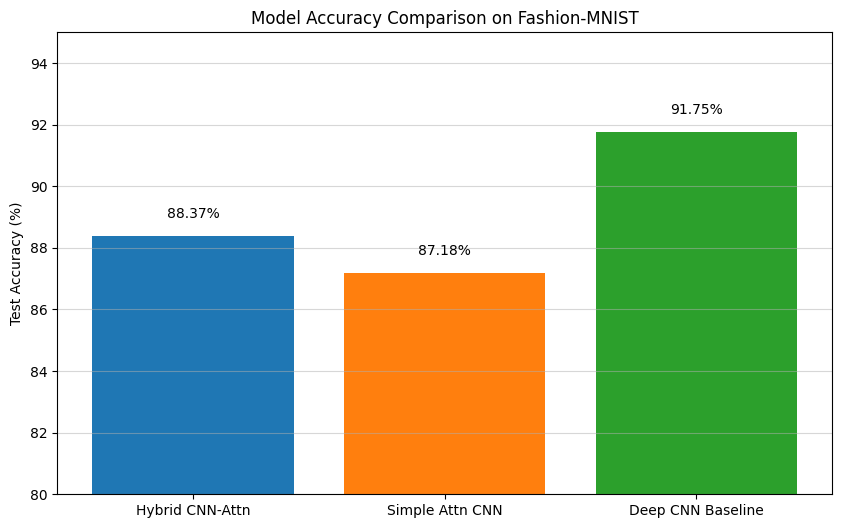

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LayerNormalization, Add, Input, Activation, MultiHeadAttention, Reshape, GlobalAveragePooling1D # Import GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Set an alias for fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

# --- Configuration ---
NUM_CLASSES = 10
INPUT_SHAPE_CNN = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 8      # Reduced epochs for faster comparison
PATIENCE = 3
NUM_HEADS = 4
EMBED_DIM = 64  # Common embedding dimension for attention models

# --- Data Loading ---

def load_and_preprocess_data():
    """Loads Fashion-MNIST and prepares the data for the CNNs."""
    print("--- Loading and Preprocessing Data ---")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn = np.expand_dims(x_test, -1)
    return x_train_cnn, y_train, x_test_cnn, y_test

# --- 1. Hybrid CNN-Attention Model (The most advanced, using functional API) ---

def attention_block(x):
    """Applies Multi-Head Self-Attention."""
    _, h, w, c = x.shape
    x_seq = Reshape((h * w, c))(x) # Flatten spatial dims to a sequence
    norm_x = LayerNormalization(epsilon=1e-6)(x_seq)

    attn_output = MultiHeadAttention(
        num_heads=NUM_HEADS,
        key_dim=EMBED_DIM,
        dropout=0.3
    )(norm_x, norm_x)

    x_out = Add()([attn_output, x_seq]) # Residual connection
    return x_out

def build_hybrid_cnn_attention(input_shape):
    """CNN Feature Extraction followed by a single Attention block."""
    input_tensor = Input(shape=input_shape)

    # CNN Feature Extraction
    x = Conv2D(32, (3, 3), padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # Output feature map size is set by EMBED_DIM (64)
    x = Conv2D(EMBED_DIM, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Attention Head
    x = attention_block(x)
    x = GlobalAveragePooling1D()(x) # Global Average Pooling over the sequence

    # Classification Head
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name="Hybrid_CNN_Attn")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 2. Simple Attention CNN Model (CNN with full Transformer Head) ---

def build_simple_attention_cnn(input_shape):
    """CNN Feature Extraction followed by Attention AND a Transformer MLP block."""

    def transformer_mlp_block(x):
        """A simple Transformer Feed-Forward Network (FFN) block."""
        norm_x = LayerNormalization(epsilon=1e-6)(x)
        x_ffn = Dense(EMBED_DIM * 2, activation="gelu")(norm_x)
        x_ffn = Dropout(0.3)(x_ffn)
        x_ffn = Dense(EMBED_DIM)(x_ffn)
        x_ffn = Dropout(0.3)(x_ffn)
        return Add()([x_ffn, x])

    input_tensor = Input(shape=input_shape)

    # CNN Feature Extraction
    x = Conv2D(32, (3, 3), padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(EMBED_DIM, (3, 3), padding='same', strides=2, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Attention Head (Two blocks)
    x = attention_block(x)
    x = transformer_mlp_block(x) # Added MLP Block

    # Classification
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    output_tensor = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name="Simple_Attn_CNN")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# --- 3. Deep CNN Model (The Robust Baseline, using Sequential API) ---

def build_deep_cnn_model(input_shape):
    """
    Standard, deep CNN baseline (easy to read Sequential API).
    This serves as the robust non-attention comparison model (your "ResNet" baseline).
    """
    model = Sequential([
        # FIX: Explicitly define the input layer to remove the Keras UserWarning
        Input(shape=input_shape),
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Classification Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ], name="Deep_CNN_Baseline")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# --- Training and Comparison Logic ---

def run_training_and_evaluate(model_builder, x_train, y_train, x_test, y_test, model_name, input_shape):
    """Builds, trains, and returns the final accuracy for a single model."""

    model = model_builder(input_shape)

    # Print the model being trained and its summary
    print(f"\n\n--- Training: {model_name} ---")
    model.summary()

    early_stopper = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    print("\nStarting model fit (Epoch/Loss/Accuracy will print below):")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[early_stopper],
        verbose=1 # CHANGED: Set to 1 to show training status per epoch
    )

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")

    return accuracy

def plot_comparison_bar_chart(results):
    """Plots the final test accuracies for comparison."""
    models = list(results.keys())
    accuracies = [results[m] * 100 for m in models] # Convert to percentage

    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

    plt.title('Model Accuracy Comparison on Fashion-MNIST')
    plt.ylabel('Test Accuracy (%)')
    plt.ylim(80, 95) # Zoom in for better differentiation
    plt.grid(axis='y', alpha=0.5)
    plt.show()

def main():
    # 1. Load Data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # 2. Define all models to be tested
    models_to_run = {
        "Hybrid CNN-Attn": build_hybrid_cnn_attention,
        "Simple Attn CNN": build_simple_attention_cnn,
        "Deep CNN Baseline": build_deep_cnn_model,
    }

    all_results = {}

    print("\n\n=============== STARTING MODEL COMPARISON ==============")
    print("Running three different architectures on the same dataset...")

    # 3. Train and Evaluate each model
    for name, builder_fn in models_to_run.items():
        accuracy = run_training_and_evaluate(
            builder_fn, x_train, y_train, x_test, y_test, name, INPUT_SHAPE_CNN
        )
        all_results[name] = accuracy

    # 4. Display Results
    print("\n\n=============== FINAL COMPARISON RESULTS ==============")

    # Find the best performing model
    best_model_name = max(all_results, key=all_results.get)
    best_accuracy = all_results[best_model_name]

    print(f"The best performing model is the {best_model_name} with an accuracy of {best_accuracy:.4f}")

    # 5. Plot Comparison
    plot_comparison_bar_chart(all_results)


if __name__ == "__main__":
    main()